<a href="https://colab.research.google.com/github/anjikc/Handson-ML/blob/Pytorch_task/Pytorch_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

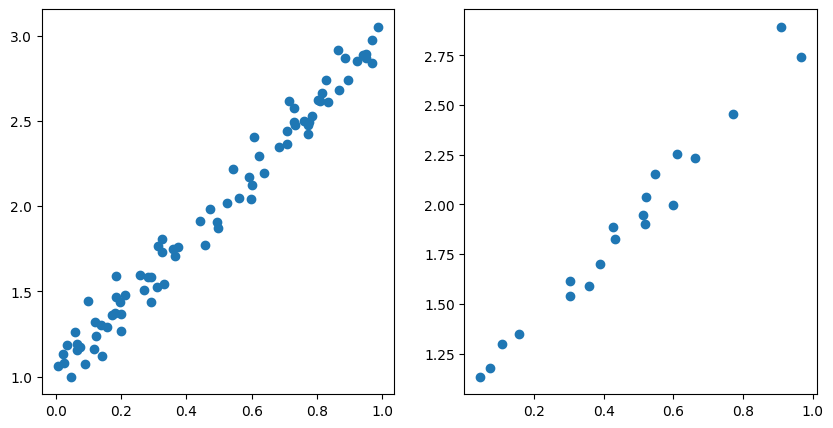

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(10,5))
ax[0].scatter(x_train,y_train)
ax[1].scatter(x_val,y_val)

In [ ]:
def find_mode(k):
  dict={}
  for elem in k:
    if elem in dict:
      dict[elem]+=1
    else:
      dict[elem]=1
  mode=None
  max_freq=0

  for key,value in dict.items():
    if value>max_freq:
      mode=key
      max_freq=value

  return mode

  


In [ ]:
lst = [1, 2, 3, 3, 3, 4, 4, 5]
mode = find_mode(lst)
print("The mode of the list is:", mode)

The mode of the list is: 3


In [ ]:
even_number=[x for x in range(0,21,1) if x%2 ==0]

In [ ]:
dict={x:x*2 for x in range (20)}
dict

{0: 0,
 1: 2,
 2: 4,
 3: 6,
 4: 8,
 5: 10,
 6: 12,
 7: 14,
 8: 16,
 9: 18,
 10: 20,
 11: 22,
 12: 24,
 13: 26,
 14: 28,
 15: 30,
 16: 32,
 17: 34,
 18: 36,
 19: 38}

In [ ]:
# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print(a, b)

# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print(a, b)

# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]
[1.02354075] [1.96896447]


In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4147 sha256=69d672c0fb8af9c88e2ad6c31d5b151d18deef9f5a41699716ef3d12e63eb494
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


In [ ]:
x_train_tensor.device

device(type='cpu')

In [ ]:
x_tensor_reverse=x_train_tensor.numpy()

In [ ]:
type(x_tensor_reverse)

numpy.ndarray

In [ ]:
# FIRST
# Initializes parameters "a" and "b" randomly, ALMOST as we did in Numpy
# since we want to apply gradient descent on these parameters, we need
# to set REQUIRES_GRAD = TRUE
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a, b)

tensor([0.7195], requires_grad=True) tensor([0.0673], requires_grad=True)


In [ ]:
# SECOND
# But what if we want to run it on a GPU? We could just send them to device, right?
a = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(a, b)
# Sorry, but NO! The to(device) "shadows" the gradient...

tensor([-0.4332], requires_grad=True) tensor([0.1382], requires_grad=True)


In [ ]:
# THIRD
# We can either create regular tensors and send them to the device (as we did with our data)
a = torch.randn(1, dtype=torch.float).to(device)
b = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([0.5188], requires_grad=True) tensor([-0.1525], requires_grad=True)


In [ ]:

#####Do like this 
# We can specify the device at the moment of creation - RECOMMENDED!
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [ ]:
lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    # No more manual computation of gradients! 
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    # Let's check the computed gradients...
    print(a.grad)
    print(b.grad)
    
    # What about UPDATING the parameters? Not so fast...
    
    # FIRST ATTEMPT
    # AttributeError: 'NoneType' object has no attribute 'zero_'
    # a = a - lr * a.grad
    # b = b - lr * b.grad
    # print(a)

    # SECOND ATTEMPT
    # RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.
    # a -= lr * a.grad
    # b -= lr * b.grad        
    
    # THIRD ATTEMPT
    # We need to use NO_GRAD to keep the update out of the gradient computation
    # Why is that? It boils down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
    
    # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go...
    a.grad.zero_()
    b.grad.zero_()
    
print(a, b)

tensor([-3.1125])
tensor([-1.8156])
tensor([-2.3184])
tensor([-1.4064])
tensor([-1.7219])
tensor([-1.0982])
tensor([-1.2737])
tensor([-0.8659])
tensor([-0.9372])
tensor([-0.6906])
tensor([-0.6845])
tensor([-0.5583])
tensor([-0.4948])
tensor([-0.4582])
tensor([-0.3526])
tensor([-0.3824])
tensor([-0.2459])
tensor([-0.3248])
tensor([-0.1660])
tensor([-0.2810])
tensor([-0.1063])
tensor([-0.2475])
tensor([-0.0616])
tensor([-0.2218])
tensor([-0.0283])
tensor([-0.2019])
tensor([-0.0036])
tensor([-0.1864])
tensor([0.0147])
tensor([-0.1743])
tensor([0.0283])
tensor([-0.1646])
tensor([0.0382])
tensor([-0.1568])
tensor([0.0453])
tensor([-0.1505])
tensor([0.0505])
tensor([-0.1452])
tensor([0.0541])
tensor([-0.1408])
tensor([0.0566])
tensor([-0.1370])
tensor([0.0582])
tensor([-0.1337])
tensor([0.0592])
tensor([-0.1307])
tensor([0.0597])
tensor([-0.1280])
tensor([0.0599])
tensor([-0.1255])
tensor([0.0598])
tensor([-0.1232])
tensor([0.0594])
tensor([-0.1211])
tensor([0.0590])
tensor([-0.1190])
tensor